In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\lalin\Downloads\customer_support_tickets.csv")

In [5]:
print("Data Info:")

Data Info:


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [11]:
print("\nFirst few rows:\n", df.head())


First few rows:
    Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Per

In [13]:
df.dropna(inplace=True)

In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

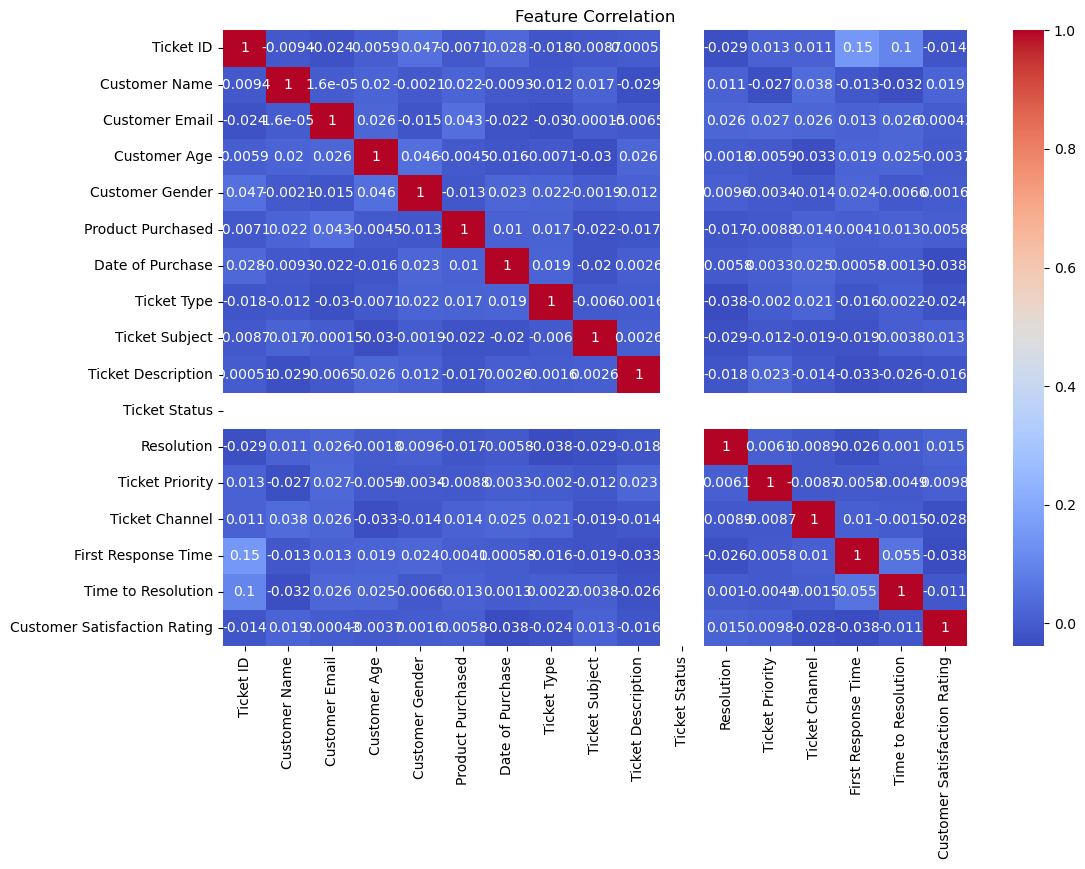

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [25]:
print(df.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


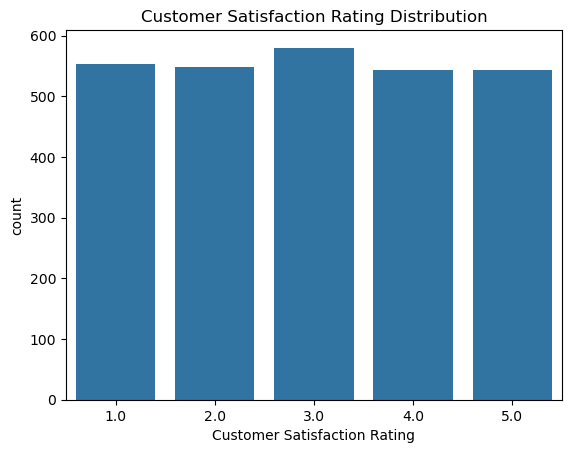

In [27]:
sns.countplot(x='Customer Satisfaction Rating', data=df)
plt.title("Customer Satisfaction Rating Distribution")
plt.show()

In [29]:
X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [39]:
y_pred = rf.predict(X_test_scaled)

In [41]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.2292418772563177

Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.19      0.20       109
         2.0       0.26      0.22      0.24       117
         3.0       0.25      0.35      0.29       112
         4.0       0.25      0.22      0.23       108
         5.0       0.18      0.16      0.17       108

    accuracy                           0.23       554
   macro avg       0.23      0.23      0.23       554
weighted avg       0.23      0.23      0.23       554


Confusion Matrix:
 [[21 21 25 23 19]
 [22 26 36 11 22]
 [25 20 39 16 12]
 [19 16 23 24 26]
 [19 17 32 23 17]]


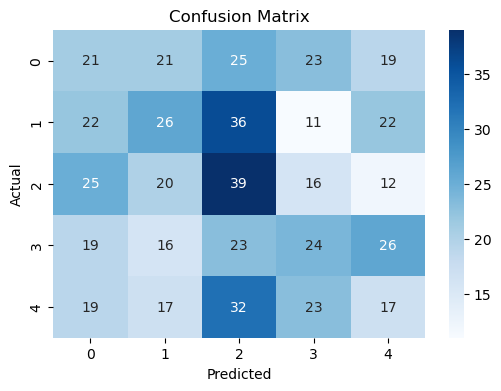

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

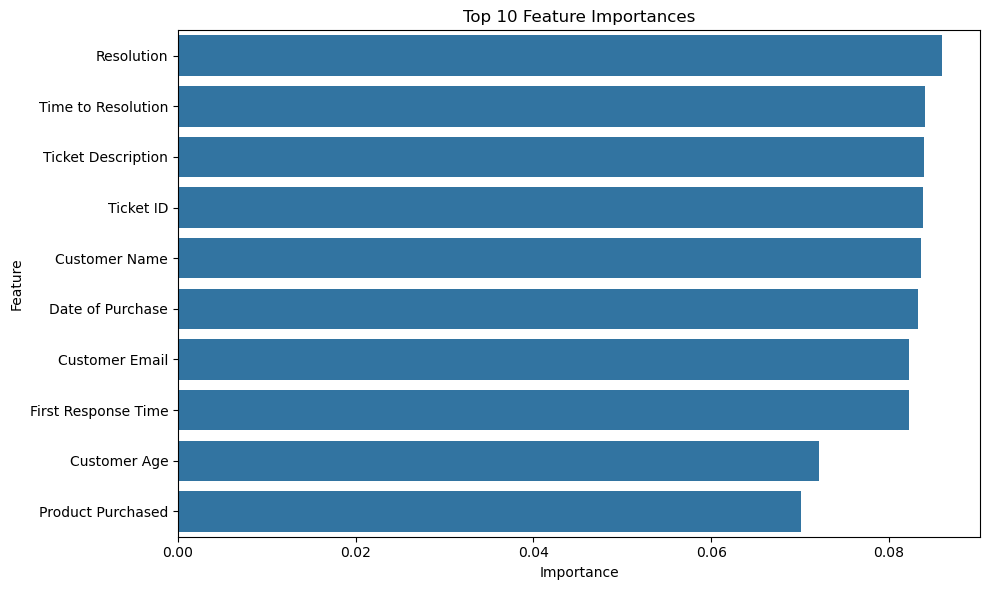

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

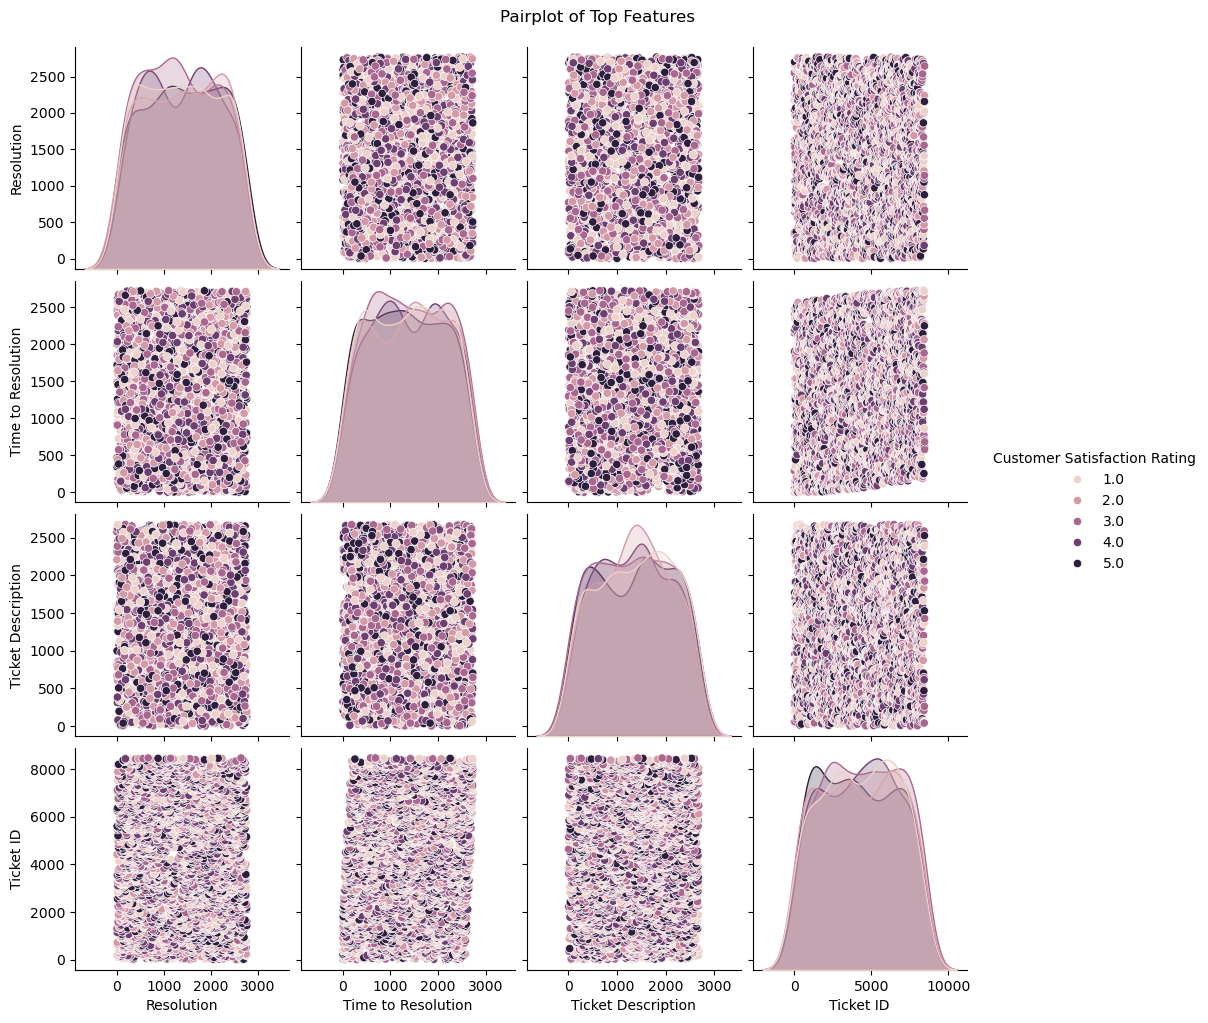

In [53]:
top_features = feat_imp_df['Feature'].tolist()
selected_features = top_features[:4] + ['Customer Satisfaction Rating']

sns.pairplot(df[selected_features], hue='Customer Satisfaction Rating')
plt.suptitle("Pairplot of Top Features", y=1.02)
plt.show()

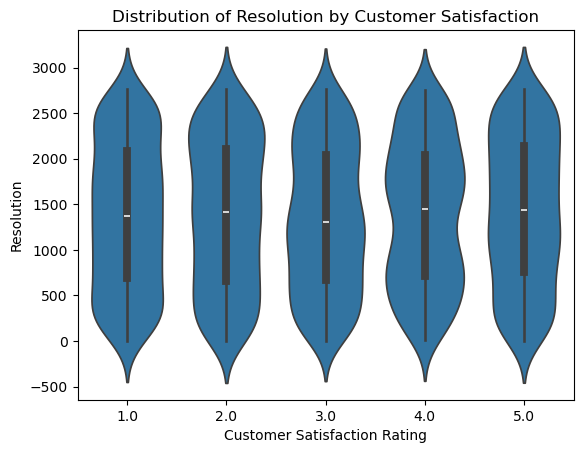

In [55]:
top_feature = top_features[0]

plt.figure()
sns.violinplot(x='Customer Satisfaction Rating', y=top_feature, data=df)
plt.title(f"Distribution of {top_feature} by Customer Satisfaction")
plt.show()

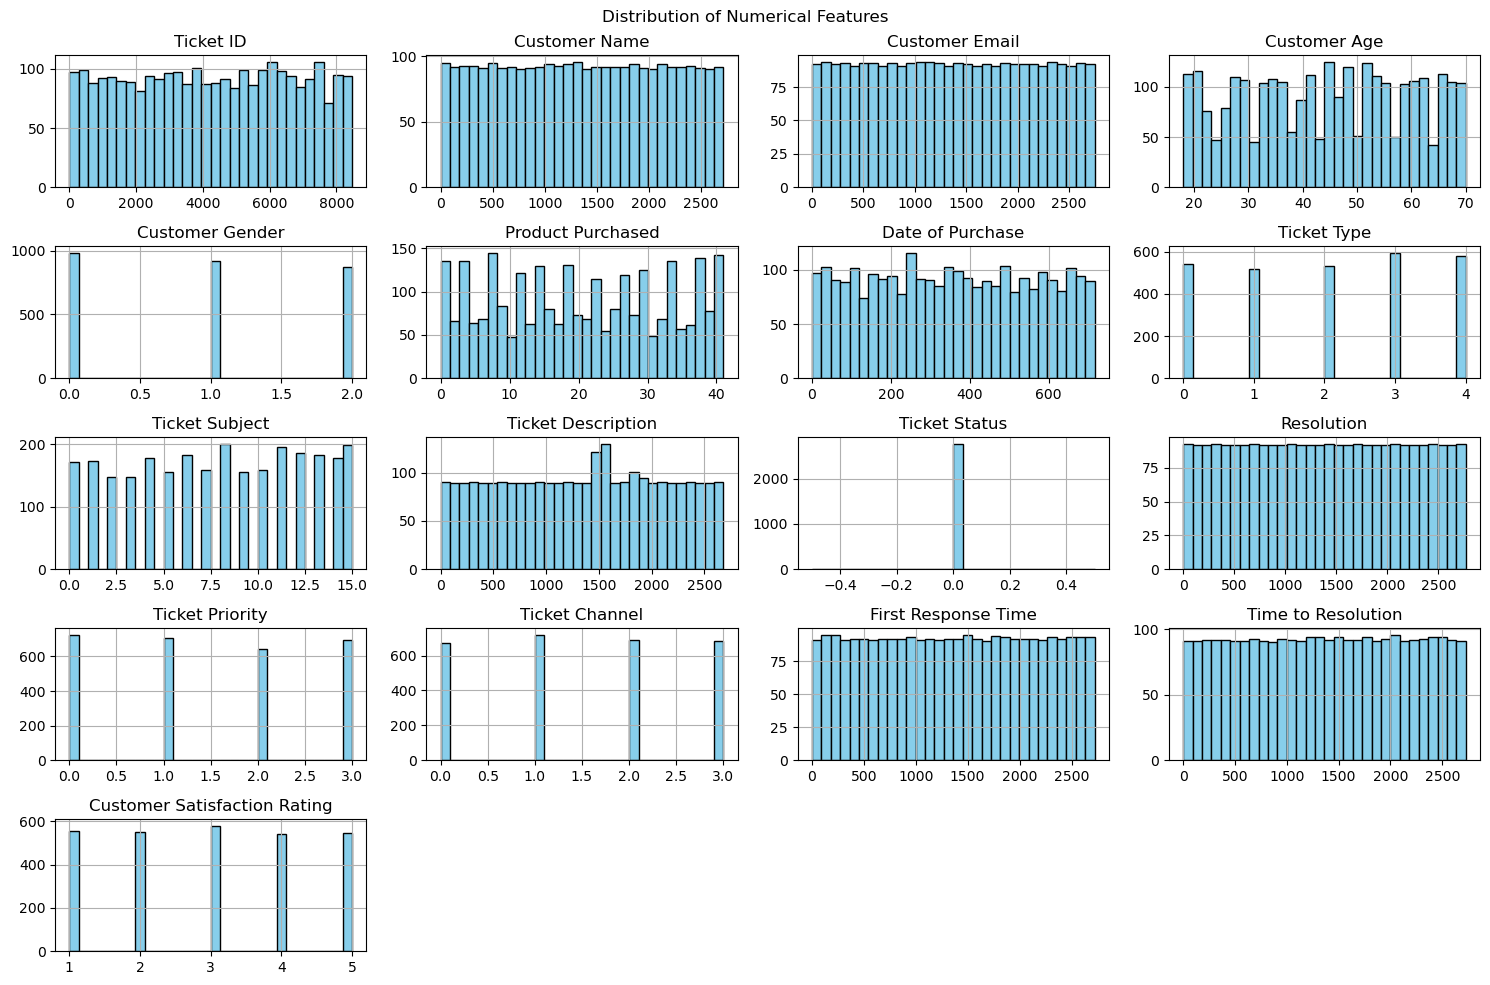

In [59]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

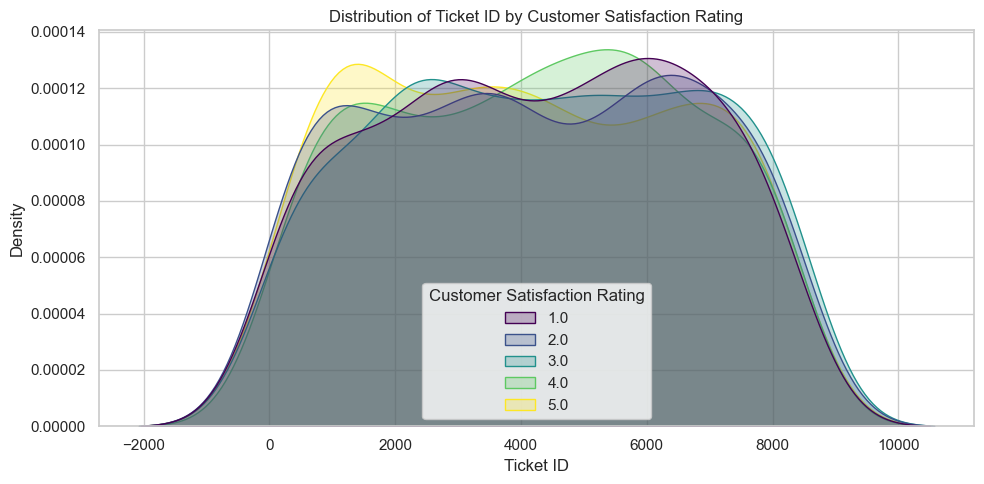

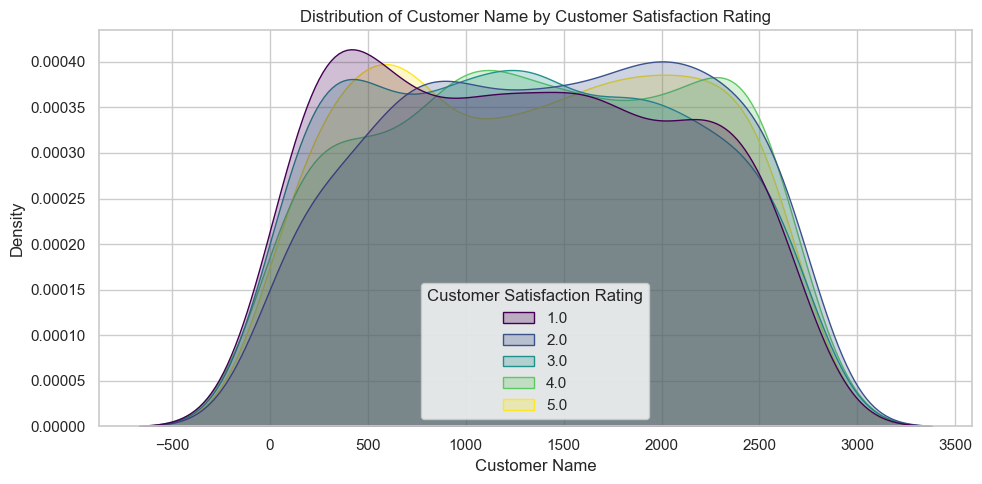

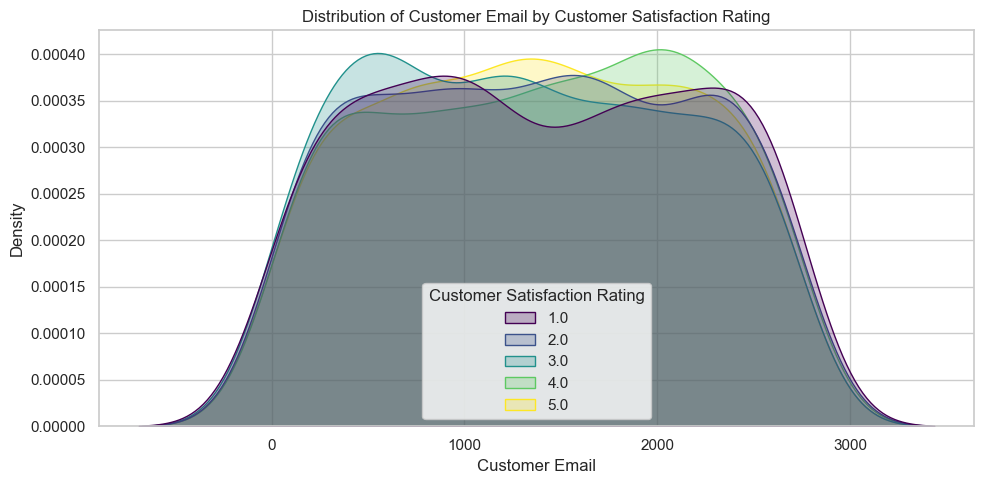

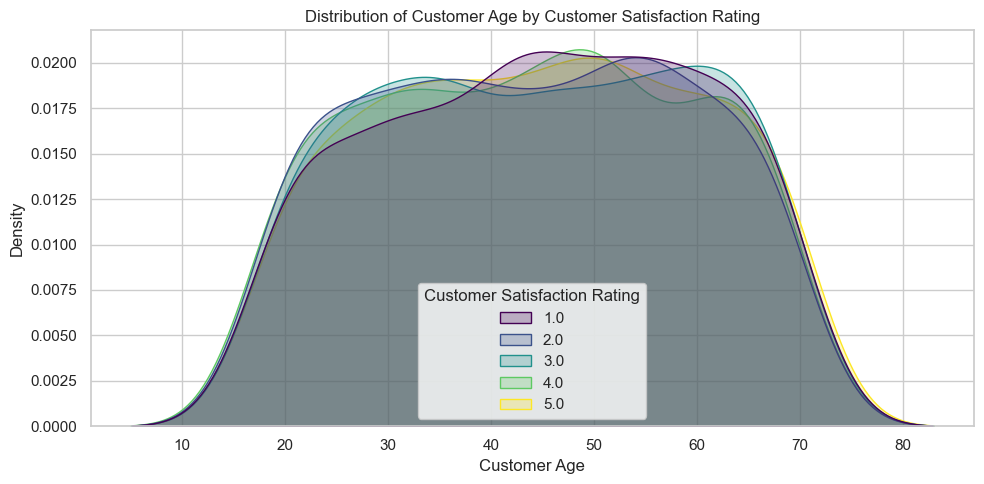

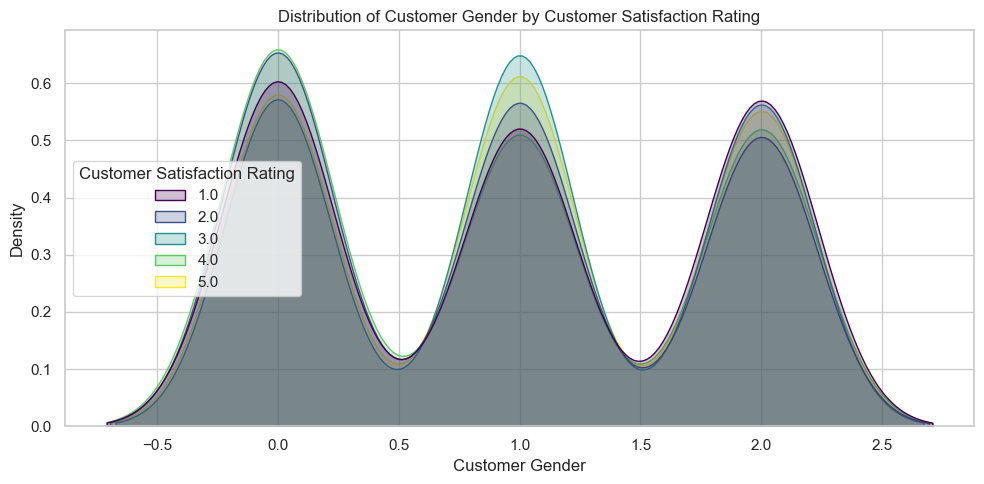

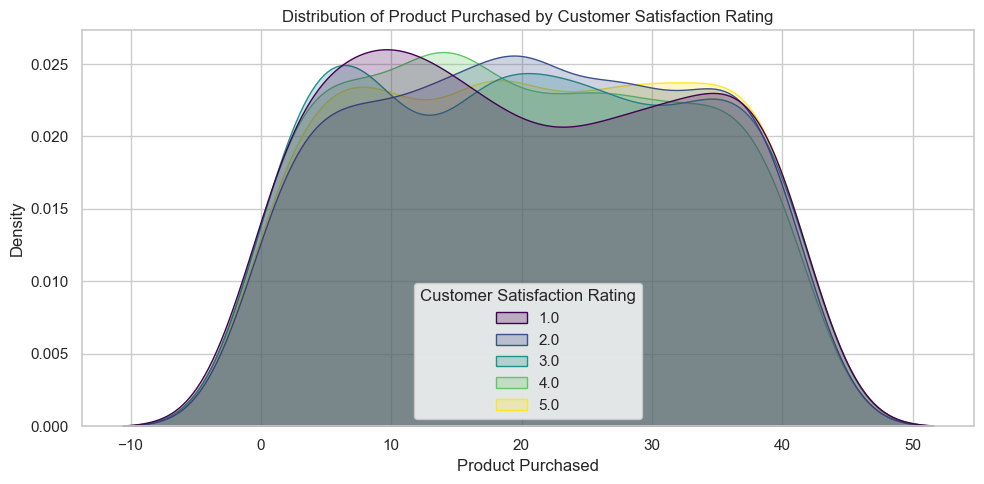

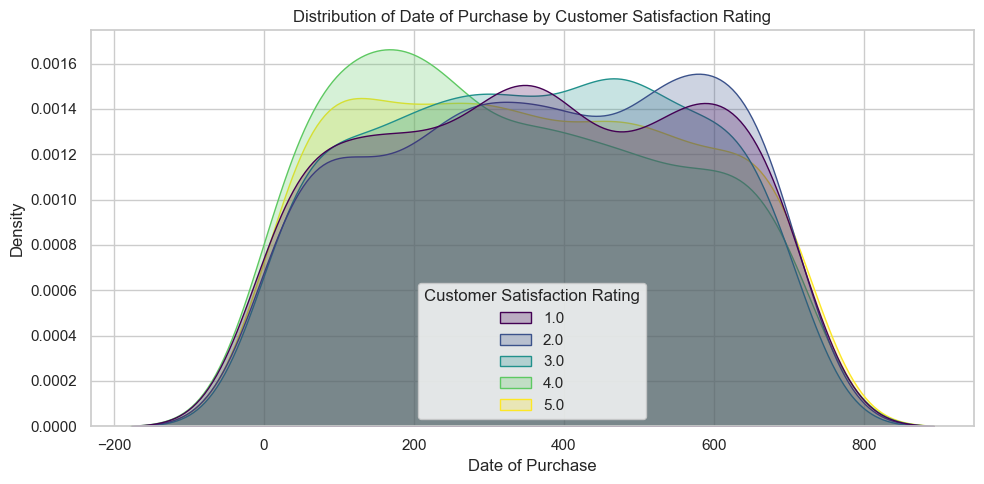

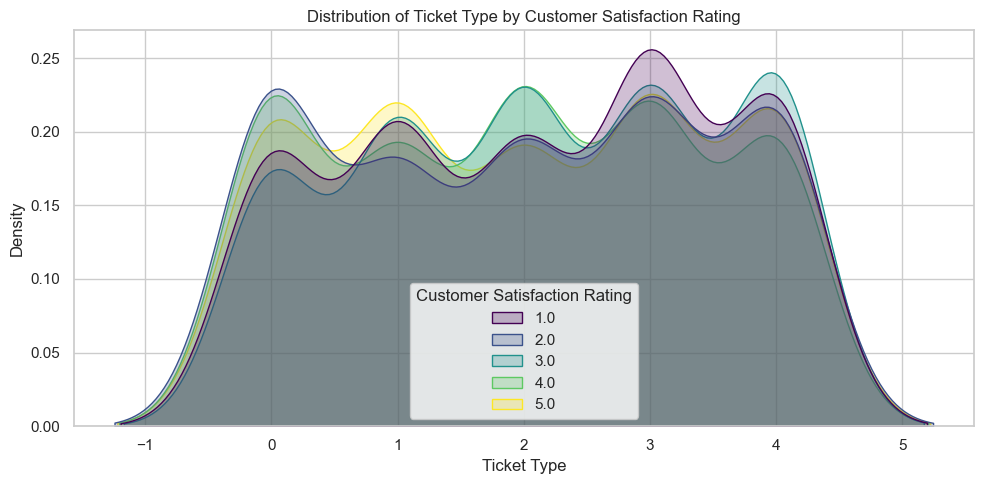

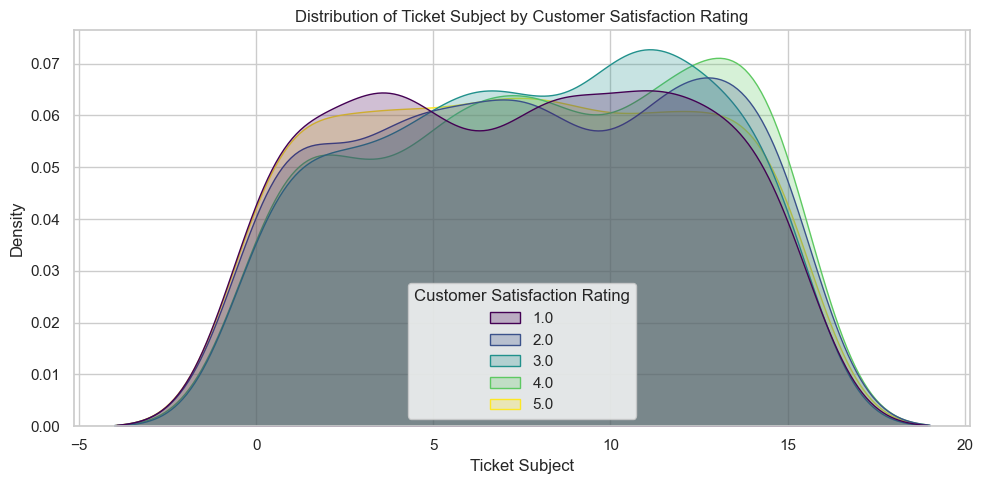

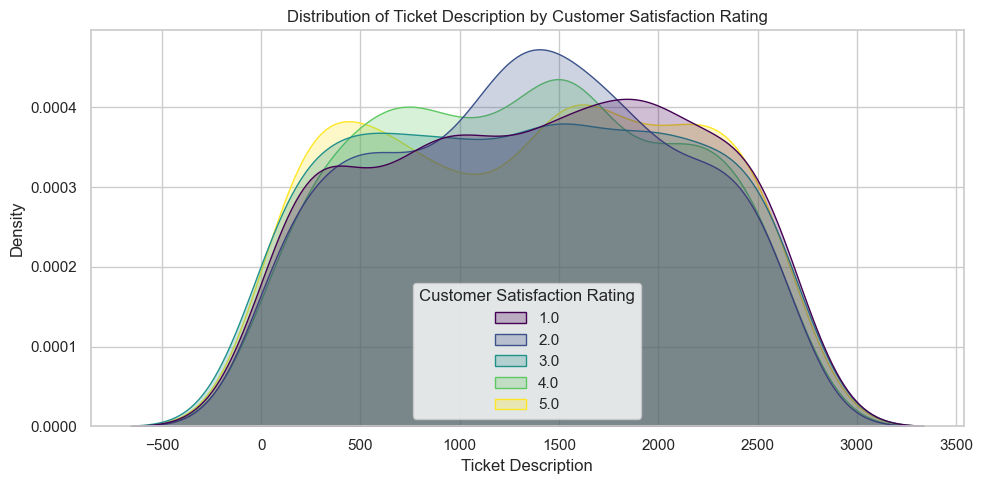

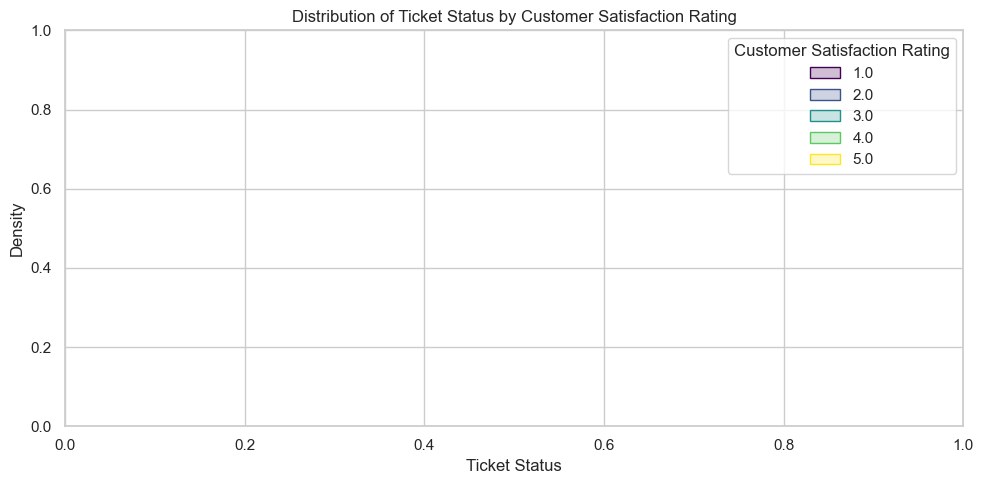

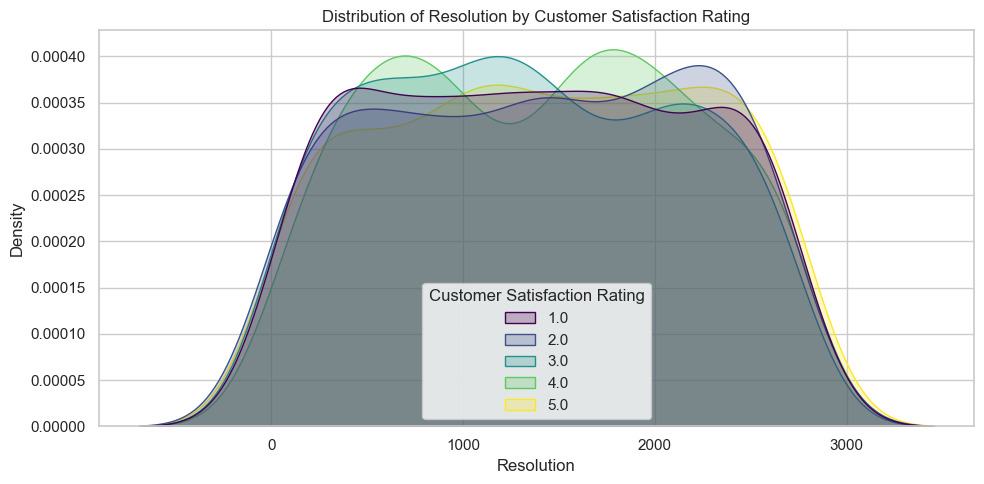

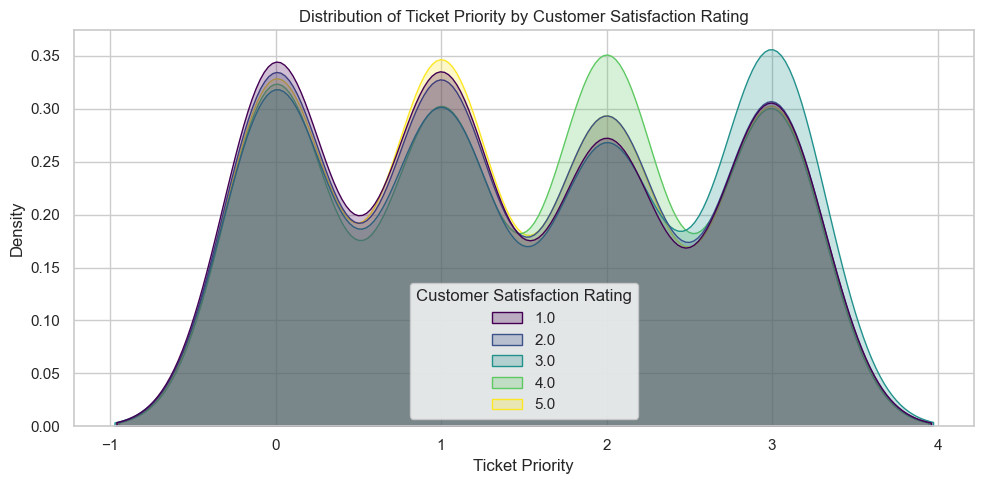

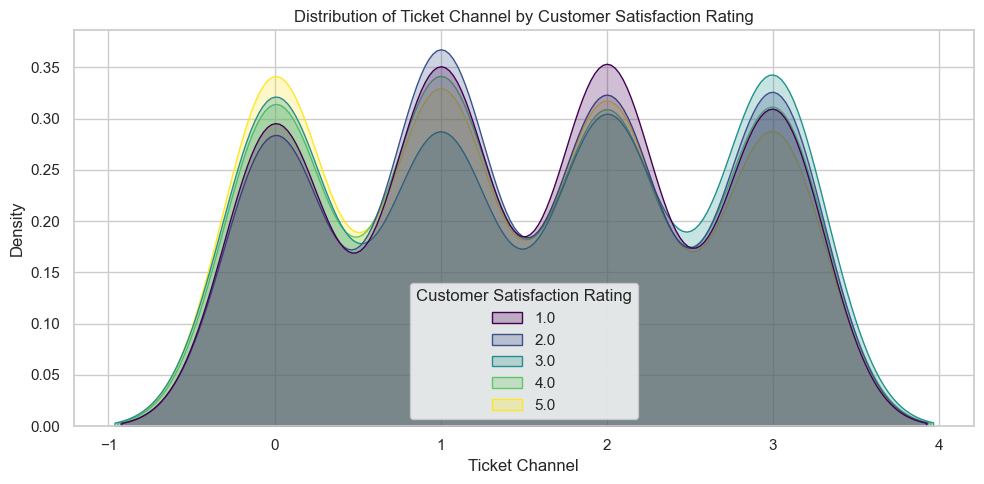

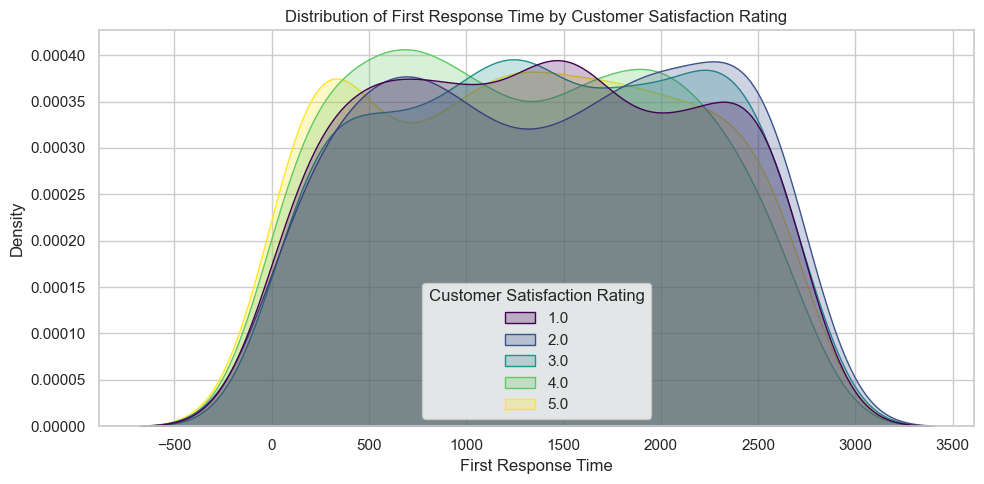

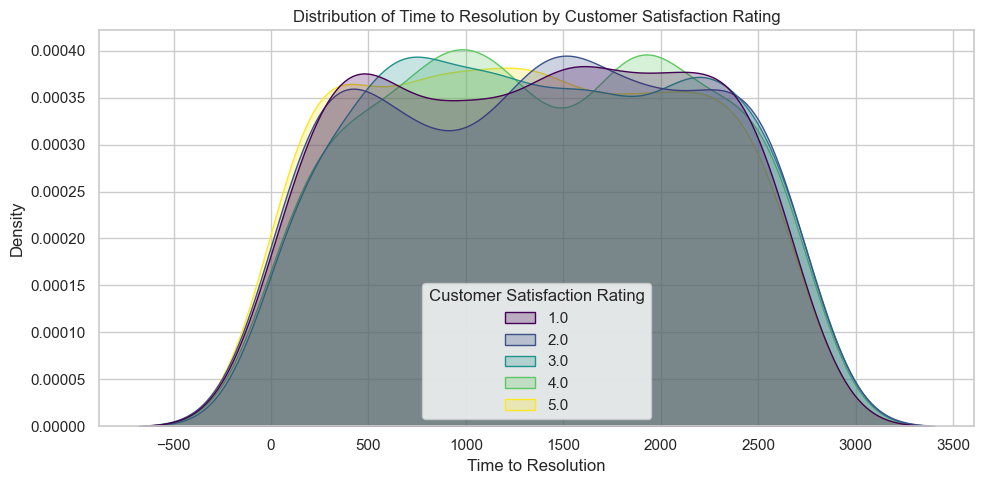

In [65]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Get all numerical columns (excluding the target)
num_cols = df.select_dtypes(include=np.number).columns.drop('Customer Satisfaction Rating')

# Plot distribution for each numerical column segmented by satisfaction rating
for col in num_cols:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Customer Satisfaction Rating', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of {col} by Customer Satisfaction Rating')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

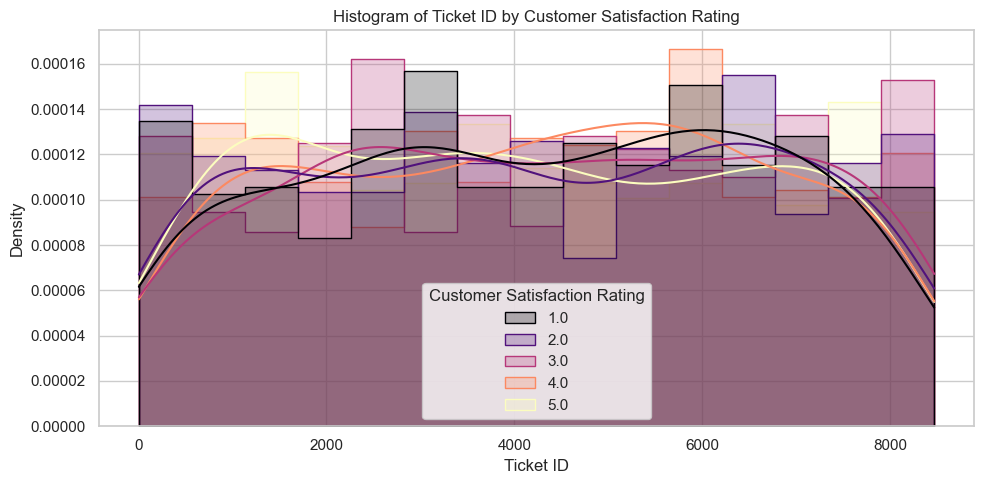

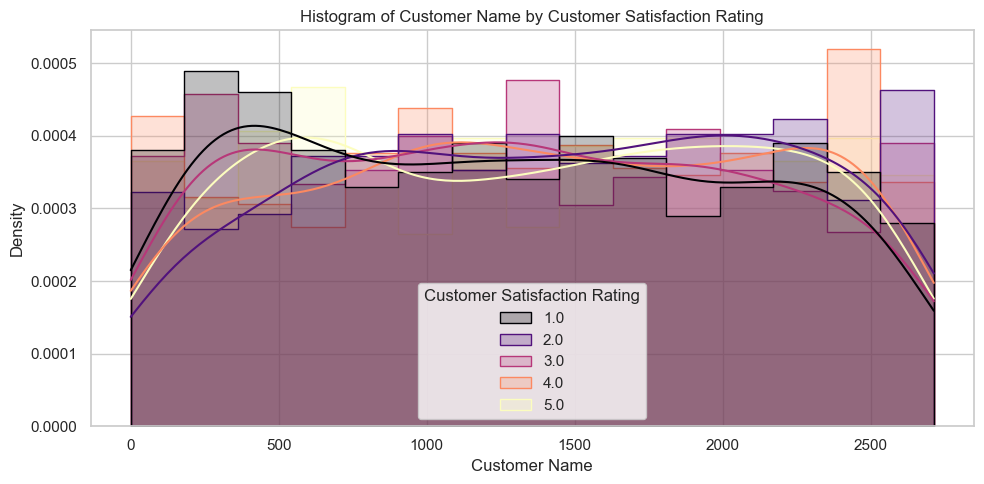

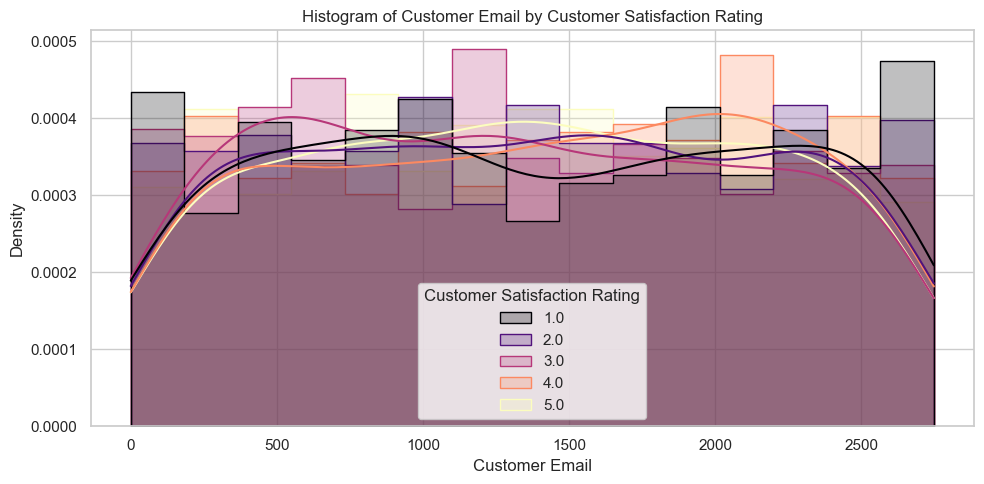

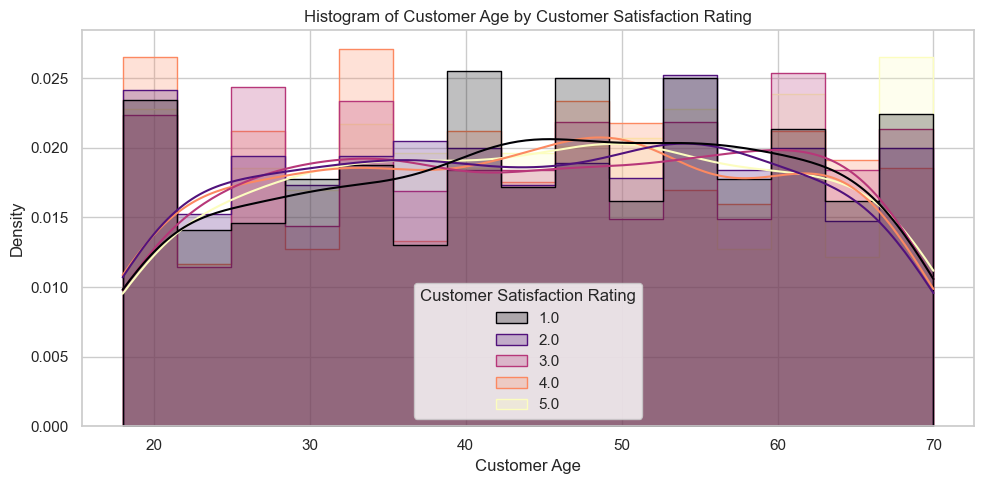

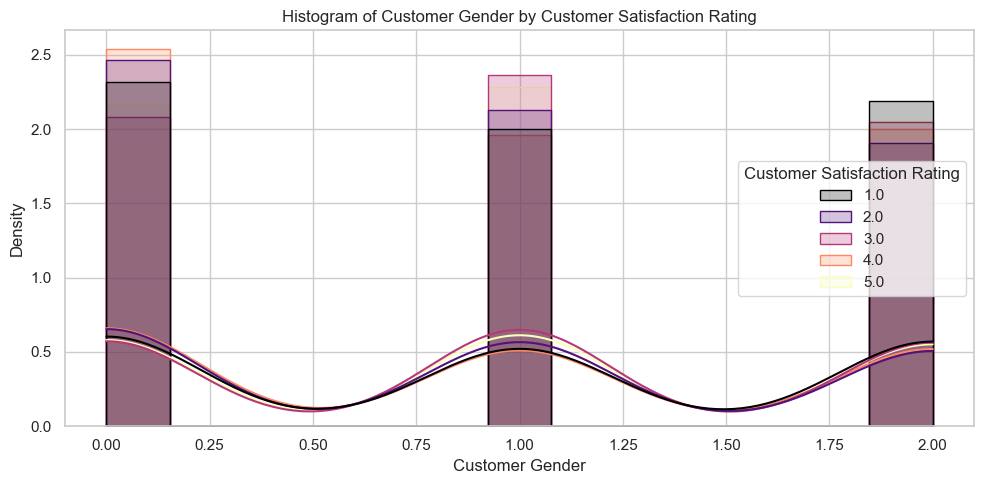

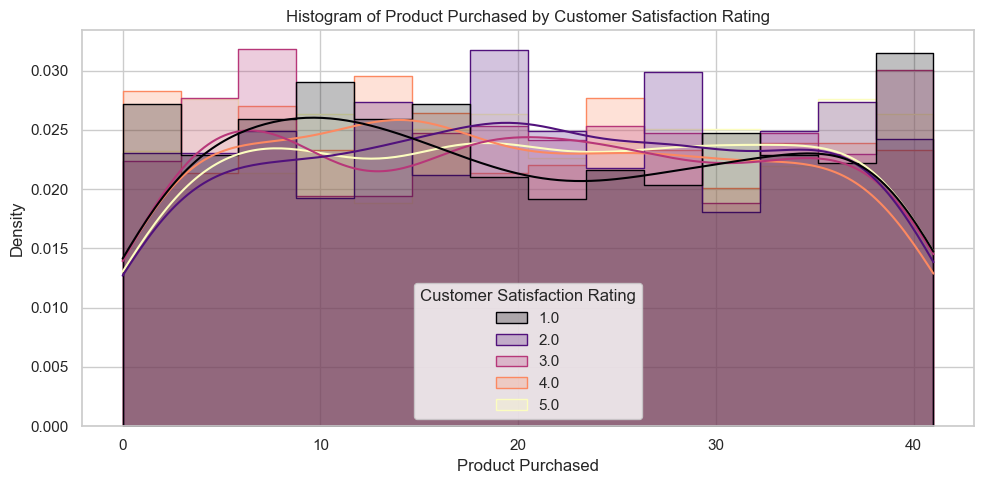

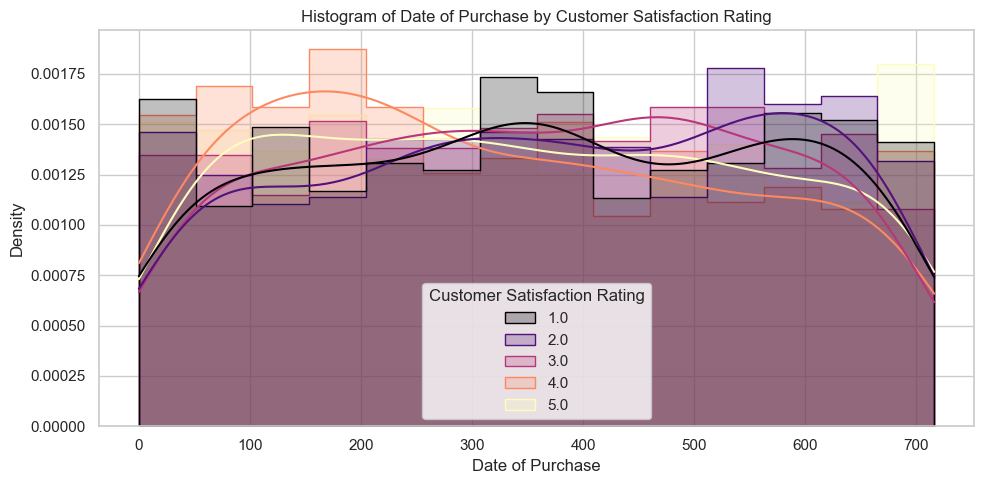

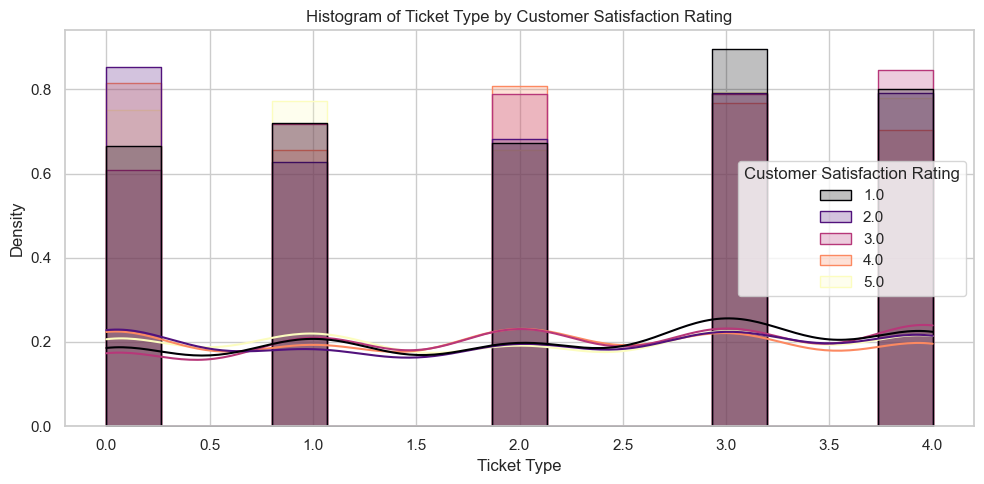

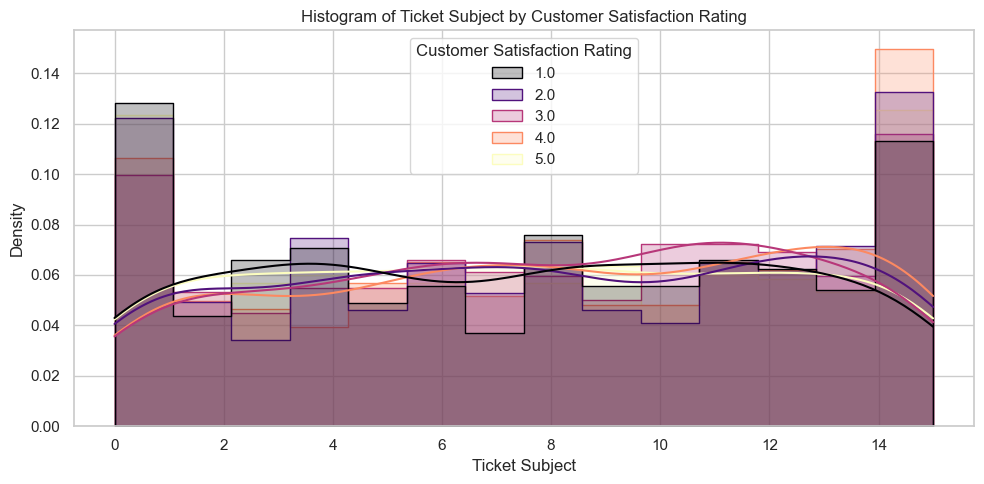

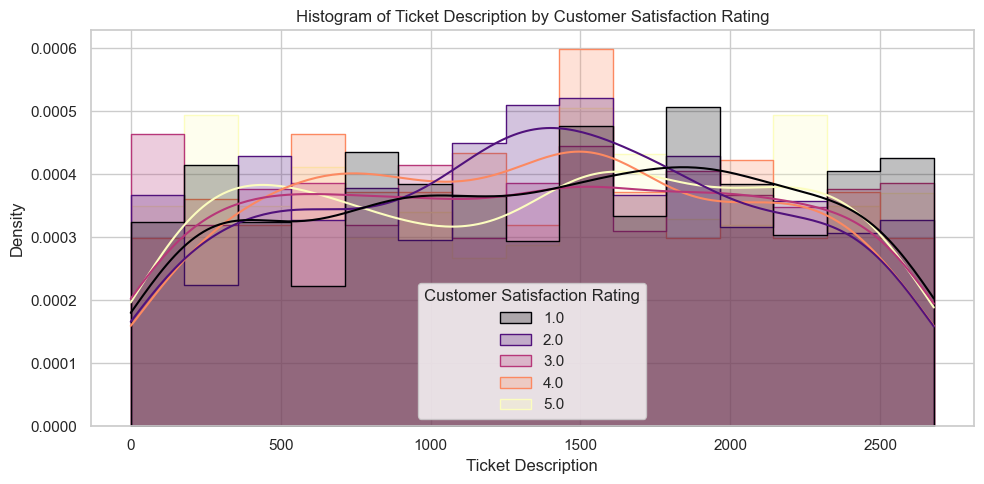

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

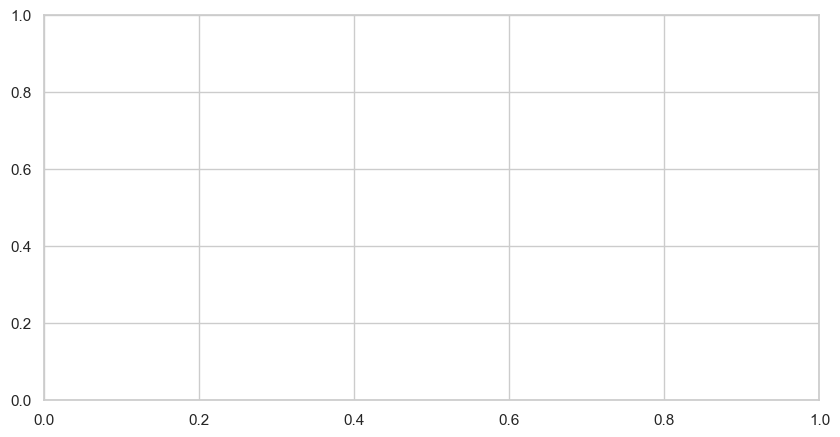

In [67]:
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='Customer Satisfaction Rating', kde=True, element="step", stat="density", common_norm=False, palette="magma")
    plt.title(f"Histogram of {col} by Customer Satisfaction Rating")
    plt.tight_layout()
    plt.show()
